# Ejercicios de la Clase 1 "Vectores"


##Ejercicio 1: Ortogonalidad

Definir una función en python que detecte si dos vectores son ortogonales

In [48]:
import numpy as np
def son_ortogonales(u,v):
  return u.dot(v) == 0

##Ejercicio 2: Desplazamiento

Definir una función en python que reciba como parámetro las cuatro esquinas de un cuadrilátero y las desplace 5 unidades hacia arriba y 7 unidades a la izquierda. Demuestre gráficamente su funcionamiento

In [49]:
def desplazar_punto(a):
  return a + np.array([-7,5])

def son_ortogonales(a,b,c,d):
  return desplazar_punto(a),desplazar_punto(b),desplazar_punto(c),desplazar_punto(d)



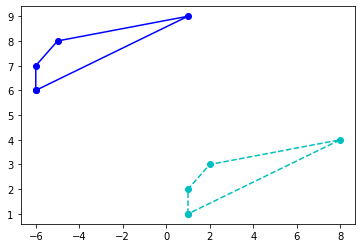

In [50]:
import matplotlib.pyplot as plt
a = np.array([1,1])
b = np.array([1,2])
c = np.array([2,3])
d = np.array([8,4])

a_,b_,c_,d_ = son_ortogonales(a,b,c,d)
x_coords, y_coords = zip(a,b,c,d,a)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

x_coords_b, y_coords_b = zip(a_,b_,c_,d_,a_)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.show()

##Ejercicio 3: Regresión lineal

El repositorio de datos del Observatorio Mundial de la Salud de la Organización Mundial de la Salud (OMS) realiza un seguimiento del estado de salud, así como de muchos otros factores relacionados, para todos los países. Usando los datos provistos por este ente, trataremos de encontrar si existe una correlación lineal entre algunos de estos factores.

Primero cargaremos los datos usando pandas.

In [ ]:
!wget "https://unket.s3.sa-east-1.amazonaws.com/data/Life Expectancy Data.csv"

In [51]:
import pandas as pd
data = pd.read_csv("Life Expectancy Data.csv")
print(data.shape)
data.head()

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


A continuación filtraremos la información teniendo en cuenta sólo el año 2014 y aquellos paises para los cuales hay datos acerca de:
* Producto Interno Bruto per cápita (en USD)
* Gasto en salud como porcentaje del Producto Interno Bruto per cápita (%)

In [52]:
data2=data.query("Year == 2014")
data2=data2.query("GDP < 80000")
data2=data2.query("`percentage expenditure` != 0")
data2 = data2.loc[:,["Country","percentage expenditure","GDP"]]
print(data2.shape)
data2.head()

(151, 3)


,Country,percentage expenditure,GDP
1,Afghanistan,73.523582,612.696514
17,Albania,428.749067,4575.763787
33,Algeria,54.237318,547.851700
49,Angola,23.965612,479.312240
65,Antigua and Barbuda,2422.999774,12888.296670


A continuación graficaremos el gasto en salud en función del pbi para corroborar que hay una dependencia lineal.

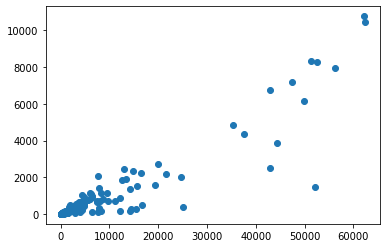

In [53]:
import matplotlib.pyplot as plt
gasto = data2.loc[:,"percentage expenditure"]
pbi = data2.loc[:,"GDP"]
plt.scatter(pbi,gasto)
plt.show()

En el gráfico, se puede ver que los puntos se alinean siguiendo algo parecido a una recta. Así que, usaremos regresión lineal para calcular la recta que más se aproxime a los datos. Siga las instrucciones para lograrlo.


####Paso 1
Transformar las variables "pbi" y "gasto" en los array de numpy "x" e "y" respectivamente. 

In [54]:
x = np.array(pbi)
y = np.array(gasto)


####Paso 2
Calcular las valores óptimos de las variables $\beta_1$ y $ \beta_0$ siguiendo las fórmulas vistas en clase.

$$\beta_1 = \frac{(\boldsymbol{x}-\boldsymbol{\bar{x}})\cdot(\boldsymbol{y}-\boldsymbol{\bar{y}})}{(\boldsymbol{x}-\boldsymbol{\bar{x}})\cdot(\boldsymbol{x}-\boldsymbol{\bar{x}})}$$

$$\beta_0 = \bar{y} - \beta_1\bar{x}$$ 

Nota: recordá que el uso del broadcasting de numpy puede ayudarte.

In [55]:
b1_num = (x - x.mean()).dot(y - y.mean())
b1_den = (x - x.mean()).dot(x - x.mean())
b1 = b1_num/b1_den
b0 = y.mean() - b1*x.mean()


####Paso 3
Calcular las predicciones del gasto usando los coeficientes obtenidos en la regresión con la fórmula $ \boldsymbol{\hat{y}} = \boldsymbol{\beta_0} + \beta_1 \boldsymbol{x}$.

Nota: recordá que el uso del broadcasting de numpy puede ayudarte.

In [56]:
y_hat = b0 + b1*x


####Paso 4
Grafica los puntos $(x,y)$ y la recta obtenida en el mismo plot para verificar su desempeño.

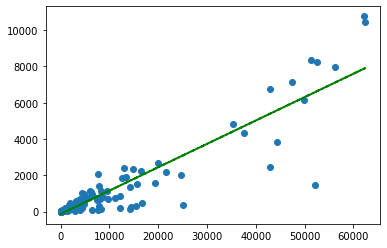

In [57]:
f, ax = plt.subplots(1)
ax.scatter(x, y)
ax.plot(x, y_hat, 'g--', linewidth=2)
plt.show(f)


## Ejercicio 4: Embeddings de personalidad

El dataset MyPersonality generó mucha [controversia](https://www.businessinsider.com/facebook-investigates-mypersonality-app-in-new-data-scare-2018-5), ya que incluye información sensible de millones de personas y no siempre fue recolectada con consentimiento. Consiste en información del perfil y de actualizaciones de la red social Facebook, apareada con puntajes de rasgos de personalidad calculadas vía un cuestionario en la app. 

La prueba Big5 (Costa y Mac Crae 1985, Goldberg et al. 2006) es una taxonomía o clasificación de rasgos de personalidad que analiza la composición de cinco dimensiones de personalidad en su sentido más amplio. Esta disertación se publicó en el Psychological Review, 41, 1-32. Los cinco factores son:

- Apertura a la experiencia (openness to experience): inventivo/curioso vs. consistente/cauteloso 
- Escrupulosidad (conscientiousness): eficiente/organizado vs. extravagante/descuidado 
- Extraversión: sociable/enérgico vs. solitario/reservado  
- Amabilidad (agreeableness): amigable/compasivo vs. desafiante/insensible 
- Neuroticismo: susceptible/nervioso vs. resistente/seguro

La siguiente celda carga el dataset y lo desordena.

In [58]:
import pandas as pd

import plotly.express as px
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np

In [59]:
df = pd.read_csv('https://unket.s3-sa-east-1.amazonaws.com/data/mypersonality.csv') 
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,8f9d4ed5d16ed1a67d734196d29d1f6b,"Ok, who wants to go to LA with me Tuesday for ...",4.33,2.00,4.17,3.67,4.40,y,n,y,y,y,07/05/09 11:45 PM,145.0,9755.34,94.75,0.04,10042.0,0.49,0.14
1,c3f4b3e345cb6b032db2e0459d179db3,is going to go play Boston on the piano =],2.45,4.00,3.80,2.80,4.25,n,y,y,n,y,06/25/09 02:30 AM,285.0,39451.60,98.17,0.02,39856.0,0.50,0.04
2,8cc4acc3bb9b04d1c4a4b4d35ca514ee,happy new year ... at last its 2010 :),3.40,2.85,3.80,3.20,3.65,n,y,y,n,n,12/31/09 06:37 PM,266.0,31169.80,89.11,0.03,34191.0,0.49,0.11
3,f65fd0385c972159743d21700c9a7887,what is on my mind... not much... it is retrea...,2.35,2.85,3.40,2.55,4.80,n,y,n,n,y,08/18/09 11:54 PM,361.0,58695.30,90.83,0.02,63826.0,0.49,0.05
4,c3f4b3e345cb6b032db2e0459d179db3,sent a postcard to postsecret yesterday =],2.45,4.00,3.80,2.80,4.25,n,y,y,n,y,10/16/09 02:54 PM,285.0,39451.60,98.17,0.02,39856.0,0.50,0.04


Las columnas sOPN, sCON, sEXT, sAGR y sNEU contienen los valores de las 5 componentes de la personalidad de cada usuario. Almacenemos los datos de personalidad de los 5 primeros ejemplos del dataset en 5 vectores numpy.

In [60]:
v0 = np.array(df.loc[0,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])
v1 = np.array(df.loc[1,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])
v2 = np.array(df.loc[2,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])
v3 = np.array(df.loc[3,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])
v4 = np.array(df.loc[4,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])

A continuación, vamos a trabajar un poco sobre estos vectores.

####Paso 1
Encontrá un vector que describa a la personalidad promedio dentro de las 5 muestras que extrajimos del dataset.

In [61]:
promedio = v0 +v1 +v2 +v3 +v4
promedio = promedio/5
print(promedio)


[4.2700000000000005 3.004 2.996 3.7939999999999996 3.1399999999999997]


####Paso 2
Programá una función que devuelva el ángulo entre dos vectores pasados como parámetro

In [62]:
import numpy.linalg as LA
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

####Paso 3
Podemos establecer qué tan parecidas son las personalidades en función del ángulo entre los vectores. Mientras menor sea el ángulo más parecida será la dirección de los vectores y también la personalidad de las personas a las que representan.
Establecé cuales dos personas son más parecidas dentro de la muestra de 5 personas que extrajimos del dataset.

In [63]:
import math
vectores = [v0,v1,v2,v3,v4]
min_angle = 180
similar_vectors = []
for v1 in vectores:
    for v2 in vectores:
        if not (v1 == v2).all():
            angle = vector_angle(v1, v2)
            if angle < min_angle:
                min_angle = angle
                similar_vectors.clear()
                similar_vectors.append(v1)
                similar_vectors.append(v2)
print("Los vectores más parecidos son:", 
      similar_vectors[0],
      "y",
      similar_vectors[1],
      "con un ángulo de", 
      round(math.degrees(min_angle),2),
       "grados")
                
        

Los vectores más parecidos son: [4.4 3.67 4.33 4.17 2.0] y [3.65 3.2 3.4 3.8 2.85] con un ángulo de 9.04 grados
